# Task overview

**Goal: Reduce the number of accidents in 2017 based on data from 2016**

1. Question 1. Data Understanding
    * Report how many rows and columns of data have been loaded for each one of the files
    * Report a general description of the different features that can be found in Accidents.csv
    * Select and justify what features will be kept and which ones will not be used from Accidents.csv
2. Question 2. Exploratory Analysis
    * Plot histograms and other exploratory graphs for insights
    * Using roadsafetykey file, explain any patter found and any hypotheses you would have
    * Get simple statistics that could help understand the distribution of the data
    * Get a rough sense of identifying areas or type of roads with more number of accidents (Map plot)
3. Question 3. Decide Approach
    * Explain what different models could be used to reach goal of reducing the number of traffic accidents
    * Identify pros, cons and how the effectiveness of this approach could be measured
4. Question 4. Data Transformation
    * Select and justify features used for the approach and the size of data sample
    * Perform transformation required and explain them
5. Question 5. Modelling and results
    * Build supervised, unsupervised or semi-supervised model and explain the results

Datasets have been moved to the 'data' folder.

In [327]:
# Imports
import pandas as pd
import numpy as np

In [330]:
def createDataFrame(name:str) -> pd.DataFrame:
    return pd.read_csv('data/{}'.format(name))

def getNumberColsRows(df:pd.DataFrame):
    print('Number of rows: {}'.format(df.shape[0]))
    print('Number of columns: {}'.format(df.shape[1]))

def getBasicInformation(df:pd.DataFrame):
    getNumberColsRows(df)
    print(df.info())
    print()
    print('Duplicated values')
    print(df.duplicated().sum())
    print()
    print('None values')
    print(df.isna().sum())
    print()
    print(df.describe())


In [4]:
accidents = createDataFrame('Accidents2016.csv')
casualties = createDataFrame('Casualties2016.csv')
makemodel = createDataFrame('MakeModel2016.csv')
vehicles = createDataFrame('Vehicles2016.csv')

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# Data Understanding
## Report how many rows and columns of data have been loaded for each one of the files

In [60]:
getBasicInformation(accidents)

Number of rows: 136621
Number of columns: 32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               136621 non-null  object 
 1   Location_Easting_OSGR                        136614 non-null  float64
 2   Location_Northing_OSGR                       136614 non-null  float64
 3   Longitude                                    136614 non-null  float64
 4   Latitude                                     136614 non-null  float64
 5   Police_Force                                 136621 non-null  int64  
 6   Accident_Severity                            136621 non-null  int64  
 7   Number_of_Vehicles                           136621 non-null  int64  
 8   Number_of_Casualties                         136621 non-null  int64  
 9   Date          

In [24]:
accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [335]:
print("Accidents.csv: ")
getNumberColsRows(accidents)
print("Casualties.csv:")
getNumberColsRows(casualties)
print("Makemodels.csv:")
getNumberColsRows(makemodel)
print("Vehicles.csv:")
getNumberColsRows(vehicles)

Accidents.csv: 
Number of rows: 136621
Number of columns: 32
Casualties.csv:
Number of rows: 181384
Number of columns: 16
Makemodels.csv:
Number of rows: 252500
Number of columns: 24
Vehicles.csv:
Number of rows: 252500
Number of columns: 23


## Accidents.csv columns description: 
1. Location_Easting/Northing: \
10 digit ordnance survey grid reference number, the first digit define the national 100 kilometre square, the second digit define the national 10 kilometre square, the third digit define the national 1 kilometre square, the fourth digit define the national 100 metre square, the fifth digit define the national 10 metre square
2. Longitute/Latitude:

3. Police_Force:\
Code number of the police force in whose area the accident occured. 
4. Accident_Severity:\
1 - Fatal\
2 - Serious\
3 - Slight
5. Number_of_Vehicles:\
Number of vehicle records submitted for the accident
6. Number_of_Casualties:\
Number of casualty records submitted for the accident
7. Date:\
Date of the accident
8. Day_of_Week:\
Weekday
9. Time:\
Time
10. Local_Authority_(District):\
Number of the local authority in whose are the accident occured
11. Local_Authority_(Highway):

12. 1st_Road_Class\
1 - Motorway\
2 - A(M)\
3 - A\
4 - B\
5 - C\
6 - Unclassified
13. 1st_Road_Number\
Number of the road whose class was entered
14. Road_Type\
1 - Roundabout\
2 - One way street\
3 - Dual carriageway\
6 - Single carriageway\
7 - Slip Road\
9 - Unknown
15. Speed_limit\
General speed limit applicable to the road on which the accident occurred.
MPH
16. Junction_Detail\
00 - Not at or within 20 metres of junction\
01 - Roundabout\
02 - Mini roundabout\
03 - T or staggered junction\
05 - Slip road\
06 - Crossroads\
07 - Multiple junction\
08 - Using private drive or entrance\
09 - Other junction
17. 2nd_Road_Class\
For junction accidents only\
1 - Motorway\
2 - A(M)\
3 - A\
4 - B\
5 - C\
6 - Unclassified
18. 2nd_Road_Number\
Number of the road whose class was entered for 2nd Road Class
19. Pedestrian_Crossing-Human_Control\
0 - None within 50 metres\
1 - Control by school crossing patrol\
2 - Control by other authorised person
20. Pedestrian_Crossing-Physical_Facilities\
0 - No physical crossing facility within 50 metres\
1 - Zebra crossing\
4 - Pelican, puffin, toucan or similar non-junction pedestrian light crossing\
5 - Pedestrian phase at traffic signal junction\
7 - Footbridge or subway\
8 - Central refuge - no other controls
21. Light_Conditions\
1 - Daylight: Street lights present\
2 - Daylight: no street lighting\
3 - Daylight: street lighting unknown\
4 - Darkness: street lights present and lit\
5 - Darkness: street lights present but unlit\
6 - Darkness: no street lighting\
7 - Darkness: street lighting unknown
22. Weather_Conditions\
1 - Fine without high winds\
2 - Raining without high winds\
3 - Snowing without high winds\
4 - Fine with high winds\
5 - Raining with high winds\
6 - Snowing with high winds\
7 - Fog or mist - if hazard\
8 - Other\
9 - Uknown
23. Road_Surface_Conditions\
1 - Dry\
2 - Wet/Damp\
3 - Snow\
4 - Frost/Ice\
5 - Flood
24. Special_Conditions_at_Site\
0 - None\
1 - Automatic traffic signal out\
2 - Automatic traffic signal partially defective\
3 - Permament road signing or marking defective or obscured\
4 - Roadworks\
5 - Road surface defective\
6 - Oil or diesel\
7 - Mud
25. Carriageway_Hazards\
0 - None\
1 - Dislodged vehicle load in carriageway\
2 - Other object in carriageway\
3 - Involvement with previous accident\
6 - Pedestrian in carriageway - not injured\
7 - Any animal in carriageway
26. Urban_or_Rural_Area\
1 - Urban\
2 - Rural\
3 - Unallocated
27. Did_Police_Officer_Attend_Scene_of_Accident\
1 - Yes\
2 - No
28. LSOA_of_Accident_Location\

## Select and justify what features will be kept and which ones will not be used from Accidents.csv

In [336]:
accident_columns_kept = ['Accident_Index','Location_Easting_OSGR', 
                          'Location_Northing_OSGR','Longitude', 'Latitude', 
                          'Accident_Severity','Number_of_Vehicles', 'Number_of_Casualties', 'Date', 
                          'Day_of_Week', 'Time', '1st_Road_Class', 
                          '1st_Road_Number', 'Road_Type', 'Speed_limit', 
                          'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 
                          '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
                          'Pedestrian_Crossing-Physical_Facilities',
                          'Light_Conditions', 'Weather_Conditions',
                          'Road_Surface_Conditions', 'Special_Conditions_at_Site',
                          'Carriageway_Hazards', 'Urban_or_Rural_Area']

In [337]:
accidents_df = accidents[accident_columns_kept]
accidents_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,3,2,1,01/11/2016,3,02:30,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1
1,2016010000006,551920.0,174560.0,0.184928,51.449595,3,1,1,01/11/2016,3,00:37,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,3,1,1,01/11/2016,3,01:25,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,3,1,1,01/11/2016,3,09:15,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,3,2,1,01/11/2016,3,07:53,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1


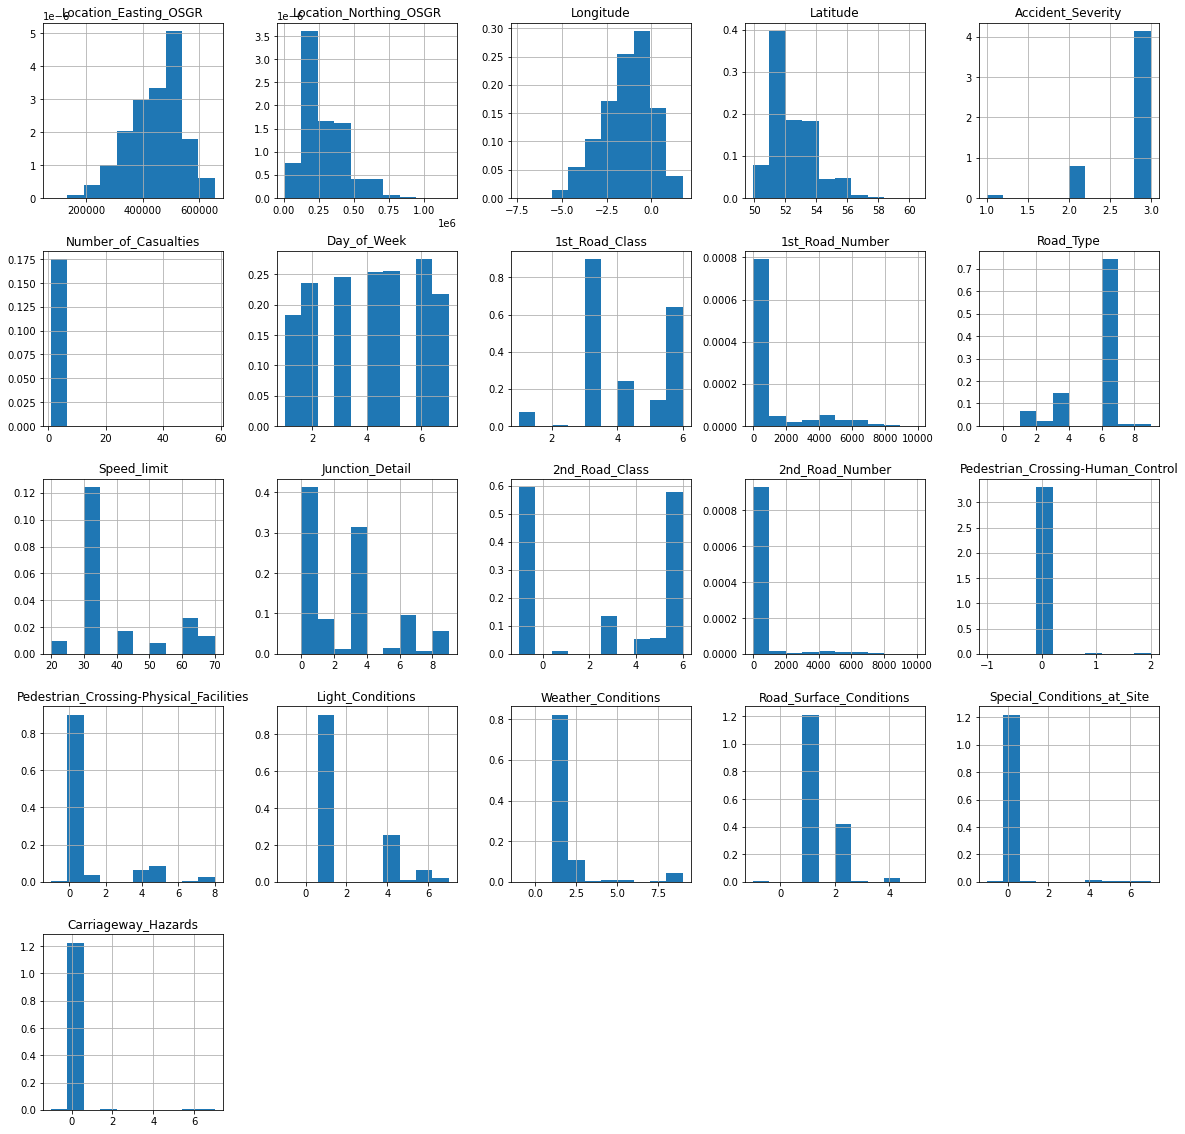

In [53]:
accidents_df.hist(density=True, figsize=(20,20));

In [271]:
accidents_categorical_cols = ['Accident_Severity', '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 
                              'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 
                              '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
                              'Pedestrian_Crossing-Physical_Facilities',
                              'Light_Conditions', 'Weather_Conditions',
                              'Road_Surface_Conditions', 'Special_Conditions_at_Site',
                              'Carriageway_Hazards', 'Day_of_Week']
labels = ['Number_of_Casualties']

# Initial Exploratory Analysis

## Plot histograms and other exploratory graphs for insights

Before doing EDA I decided to join provided dataset and add other columns to the dataset

In [275]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,E01033725
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,09:15,22,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,E01003379
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,3,07:53,25,E09000018,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002583


In [72]:
accidents['Road_Surface_Conditions'].value_counts()

 1    99206
 2    34220
 4     2008
-1      769
 3      263
 5      155
Name: Road_Surface_Conditions, dtype: int64

In [76]:
casualties.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2016010000005,2,1,1,1,23,5,3,0,0,0,0,0,2,1,4
1,2016010000006,1,1,1,2,36,7,3,0,0,0,0,0,9,1,10
2,2016010000008,1,1,1,1,24,5,3,0,0,0,0,0,9,1,8
3,2016010000016,1,1,2,2,59,9,3,0,0,0,3,0,11,1,4
4,2016010000018,2,1,1,1,28,6,3,0,0,0,0,0,1,1,6


In [115]:
casualties_grouped = casualties[casualties['Accident_Index']=='201634NE09806'].groupby(['Accident_Index', 'Casualty_Class', 'Sex_of_Casualty', 'Casualty_Severity'])['Casualty_Type'].count().reset_index().rename(columns={'Casualty_Type':'cnt'})
#casualties_grouped.sort_values('cnt', ascending=False)
casualties_grouped.pivot(index='Accident_Index', columns=['Casualty_Class', 'Sex_of_Casualty', 'Casualty_Severity'], values='cnt')

Casualty_Class     1  2           
Sex_of_Casualty    2  1      2    
Casualty_Severity  2  2   3  2   3
Accident_Index                    
201634NE09806      1  4  26  7  20

Casualties dataset has more than 1 entry per accident, this data does not contain any columns which could be used to reduce the number of accidents, but could be used for modeling as grouped data

In [227]:
casualties_clean = pd.DataFrame(list(casualties['Accident_Index'].unique()), columns=['Accident_Index'])
casualties_clean

,Accident_Index
0,2016010000005
1,2016010000006
2,2016010000008
3,2016010000016
4,2016010000018
...,...
136616,2016984130916
136617,2016984131116
136618,2016984131216
136619,2016984131316


In [228]:
casualties_clean.shape

(136621, 1)

In [142]:
casualties_columns_dict = {'Casualty_Class': {'1': 'Driver',
                                             '2': 'Passenger',
                                             '3': 'Pedestrian'},
                          'Sex_of_Casualty' : {'1': 'Male',
                                              '2': 'Female'},
                          'Casualty_Severity': {'1': 'Fatal',
                                               '2': 'Serious',
                                               '3': 'Slight'},
                          'Car_Passenger': {'0': 'Not_Passenger',
                                           '1': 'Front_Passenger',
                                           '2': 'Rear_Passenger'}}

In [133]:
for col in casualties_columns_kept:
    print(col)
    print(list(casualties[col].unique()))

Casualty_Class
[1, 2, 3]
Sex_of_Casualty
[1, 2, -1]
Casualty_Severity
[3, 2, 1]
Car_Passenger
[0, 1, 2, -1]


In [155]:
casualties.shape

(181384, 16)

In [164]:
casualties[casualties['Accident_Index']=='2016010000094']

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
53,2016010000094,1,1,1,1,24,5,3,0,0,0,0,0,9,1,4
54,2016010000094,1,2,2,1,23,5,3,0,0,2,0,0,9,1,3
55,2016010000094,1,3,2,1,37,7,3,0,0,1,0,0,9,1,3
56,2016010000094,2,4,2,1,40,7,3,0,0,2,0,0,9,1,5


In [ ]:
casualties[casualties['Accident_Index']=='2016010000016']

In [173]:
casualties_grouped = casualties.groupby(['Accident_Index','Casualty_Class'])['Casualty_Type'].count().reset_index().rename(columns={'Casualty_Type':'cnt'})
casualties_grouped[casualties_grouped['Casualty_Class']==1]

,Accident_Index,Casualty_Class,cnt
0,2016010000005,1,1
1,2016010000006,1,1
2,2016010000008,1,1
4,2016010000018,1,1
5,2016010000019,1,1
...,...,...,...
155207,2016984130916,1,1
155208,2016984131116,1,2
155209,2016984131216,1,1
155210,2016984131316,1,1


In [229]:
for col, mapping in casualties_columns_dict.items():
    casualties_grouped = casualties.groupby(['Accident_Index',col])['Casualty_Type'].count().reset_index().rename(columns={'Casualty_Type':'cnt'})
    new_cols = [col+"_"+desc for _, desc in mapping.items()]
    if col in ('Sex_of_Casualty', 'Car_Passenger'):
        pivoted = casualties_grouped[casualties_grouped[col]>=0].pivot_table(index=['Accident_Index'], columns=col, aggfunc='sum', fill_value=0).reset_index()
        pivoted.columns = ['Accident_Index', *new_cols]
        casualties_clean = pd.merge(casualties_clean, pivoted, how='left', on='Accident_Index')
    else:
        pivoted = casualties_grouped.pivot_table(index=['Accident_Index'], columns=col, aggfunc='sum', fill_value=0).reset_index()
        pivoted.columns = ['Accident_Index', *new_cols]
        casualties_clean = pd.merge(casualties_clean, pivoted, how='left', on='Accident_Index')

In [230]:
print(accidents.shape)
print(casualties_clean.shape)

(136621, 32)
(136621, 12)


In [111]:
casualties_grouped = casualties.groupby(['Accident_Index'])['Casualty_Type'].count().reset_index().rename(columns={'Casualty_Type':'cnt'})
casualties_grouped.sort_values('cnt', ascending=False)

,Accident_Index,cnt
75626,201634NE09806,58
122921,2016551602181,27
114489,2016500118178,27
62561,2016210124284,23
67155,2016300018272,21
...,...,...
49926,2016140094569,1
49925,2016140094564,1
49924,2016140094548,1
49923,2016140094528,1


In [78]:
makemodel.head()

,Accident_Index,accyr,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,make,model
0,2016010000005,2016,1,8,0,6,0,0,0,0,0,0,3,1,1,1,8,-1,-1,-1,3,1,NaN,NaN
1,2016010000005,2016,2,2,0,18,0,0,0,0,0,0,1,1,6,1,5,124,1,4,4,1,YAMAHA,HW 125 XENTER
2,2016010000006,2016,1,9,0,18,0,2,2,10,1,0,4,1,6,2,7,1461,2,1,10,1,MERCEDES,A180 BLUEEFFICIENCY SPORT CDI
3,2016010000008,2016,1,9,0,18,0,4,5,0,0,0,1,1,6,1,5,1390,1,5,8,1,VOLKSWAGEN,SCIROCCO TSI
4,2016010000016,2016,1,11,0,18,0,1,0,0,0,0,0,1,1,1,8,6692,2,7,9,1,OTHER BRITISH,Missing


In [257]:
makemodel_columns_kept = ['Accident_Index', 'Vehicle_Type', 'Towing_and_Articulation', '1st_Point_of_Impact', 'Sex_of_Driver', 'Engine_Capacity_(CC)', 
                        'Propulsion_Code', 'Age_of_Vehicle', 'make', 'model']

In [106]:
makemodel_grouped = makemodel[makemodel['Vehicle_Reference']==1].groupby('Accident_Index')['Vehicle_Type'].count().reset_index().rename(columns={'Vehicle_Type':'cnt'})
makemodel_grouped.sort_values('cnt', ascending=False)

,Accident_Index,cnt
0,2016010000005,1
91052,2016430291710,1
91066,2016430291832,1
91065,2016430291820,1
91064,2016430291816,1
...,...,...
45523,2016133621562,1
45522,2016133621398,1
45521,2016133621224,1
45520,2016133620935,1


In [105]:
makemodel[makemodel['Accident_Index']=='2016140142191']

,Accident_Index,accyr,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,make,model
92920,2016140142191,2016,1,9,0,18,0,1,5,0,0,0,1,1,6,1,5,-1,-1,-1,1,1,RENAULT,KANGOO SL17DCI 70
92921,2016140142191,2016,2,9,0,18,0,1,0,0,0,0,2,1,6,1,6,1998,2,15,2,1,FORD,MONDEO GHIA X TDDI
92922,2016140142191,2016,3,9,0,3,0,1,0,0,0,0,3,1,1,1,8,2993,2,2,1,1,LAND ROVER,DISCOVERY GS SDV6 AUTO
92923,2016140142191,2016,4,9,0,18,0,1,0,0,0,0,1,1,1,1,7,2993,2,2,1,1,BMW,330D XDRIVE AC AUTO
92924,2016140142191,2016,5,9,0,3,0,1,0,0,0,0,3,1,6,1,6,-1,-1,-1,5,1,FORD,TRANSIT 85 T280M FWD
92925,2016140142191,2016,6,9,0,18,0,1,0,0,0,0,1,1,1,1,8,2993,2,3,1,1,BMW,330D XDRIVE AC AUTO
92926,2016140142191,2016,7,9,0,18,0,1,0,0,0,0,1,1,1,1,8,1968,2,3,1,1,SKODA,OCTAVIA SCOUT TDI CR
92927,2016140142191,2016,8,9,0,2,0,1,0,0,0,0,1,1,6,3,6,1390,1,1,8,1,SEAT,IBIZA TOCA
92928,2016140142191,2016,9,9,0,2,0,1,0,0,0,0,1,1,6,3,6,-1,-1,-1,8,1,VOLKSWAGEN,CADDY MAXI C20 TDI
92929,2016140142191,2016,10,9,0,2,0,1,0,0,0,0,4,1,6,3,8,-1,-1,-1,1,1,FORD,RANGER WILDTRAK 4X4 DCB TDCI A


In [9]:
makemodel[makemodel_columns_kept]

,Vehicle_Type,Towing_and_Articulation,Sex_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,make,model
0,8,0,1,-1,-1,-1,NaN,NaN
1,2,0,1,124,1,4,YAMAHA,HW 125 XENTER
2,9,0,2,1461,2,1,MERCEDES,A180 BLUEEFFICIENCY SPORT CDI
3,9,0,1,1390,1,5,VOLKSWAGEN,SCIROCCO TSI
4,11,0,1,6692,2,7,OTHER BRITISH,Missing
...,...,...,...,...,...,...,...,...
252495,9,0,2,1598,1,14,MINI,MINI COOPER
252496,9,0,2,1598,2,-1,VAUXHALL,ASTRA ENERGY CDTI
252497,21,0,1,-1,-1,-1,NaN,NaN
252498,9,0,1,1796,1,13,VAUXHALL,VECTRA SXI 16V


In [79]:
vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2016010000005,1,8,0,6,0,0,0,0,0,0,3,1,1,1,51,8,-1,-1,-1,3,1,3
1,2016010000005,2,2,0,18,0,0,0,0,0,0,1,1,6,1,23,5,124,1,4,4,1,4
2,2016010000006,1,9,0,18,0,2,2,10,1,0,4,1,6,2,36,7,1461,2,1,10,1,10
3,2016010000008,1,9,0,18,0,4,5,0,0,0,1,1,6,1,24,5,1390,1,5,8,1,8
4,2016010000016,1,11,0,18,0,1,0,0,0,0,0,1,1,1,55,8,6692,2,7,9,1,9


In [140]:
vehicles_grouped = vehicles[vehicles['Vehicle_Reference']==1].groupby('Accident_Index')['Vehicle_Reference'].count().reset_index().rename(columns={'Vehicle_Reference':'cnt'})
vehicles_grouped.sort_values('cnt', ascending=False)

,Accident_Index,cnt
0,2016010000005,1
91052,2016430291710,1
91066,2016430291832,1
91065,2016430291820,1
91064,2016430291816,1
...,...,...
45523,2016133621562,1
45522,2016133621398,1
45521,2016133621224,1
45520,2016133620935,1


In [328]:
vehicles_columns_kept = ['Accident_Index', 'Age_of_Driver', 'Age_Band_of_Driver']

In [329]:
vehicles[vehicles_columns_kept]

,Accident_Index,Age_of_Driver,Age_Band_of_Driver
0,2016010000005,51,8
1,2016010000005,23,5
2,2016010000006,36,7
3,2016010000008,24,5
4,2016010000016,55,8
...,...,...,...
252495,2016984131116,24,5
252496,2016984131116,62,9
252497,2016984131216,61,9
252498,2016984131316,17,4


In [139]:
vehicles[vehicles['Accident_Index']=='2016140142191']

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
92920,2016140142191,1,9,0,18,0,1,5,0,0,0,1,1,6,1,22,5,-1,-1,-1,1,1,1
92921,2016140142191,2,9,0,18,0,1,0,0,0,0,2,1,6,1,34,6,1998,2,15,2,1,2
92922,2016140142191,3,9,0,3,0,1,0,0,0,0,3,1,1,1,48,8,2993,2,2,1,1,1
92923,2016140142191,4,9,0,18,0,1,0,0,0,0,1,1,1,1,42,7,2993,2,2,1,1,1
92924,2016140142191,5,9,0,3,0,1,0,0,0,0,3,1,6,1,34,6,-1,-1,-1,5,1,5
92925,2016140142191,6,9,0,18,0,1,0,0,0,0,1,1,1,1,50,8,2993,2,3,1,1,1
92926,2016140142191,7,9,0,18,0,1,0,0,0,0,1,1,1,1,48,8,1968,2,3,1,1,1
92927,2016140142191,8,9,0,2,0,1,0,0,0,0,1,1,6,3,28,6,1390,1,1,8,1,8
92928,2016140142191,9,9,0,2,0,1,0,0,0,0,1,1,6,3,32,6,-1,-1,-1,8,1,8
92929,2016140142191,10,9,0,2,0,1,0,0,0,0,4,1,6,3,46,8,-1,-1,-1,1,1,1


In [89]:
accidents.shape

(136621, 32)

## Dataframes for join:
accidents[accident_columns_kept] - 136621\
casualties_clean\
makemodel[makemodel['Vehicle_Reference']==1][makemodel_columns_kept]\
vehicles[vehicles['Vehicle_Reference']==1][vehicles_columns_kept]

In [285]:
combined_df = pd.merge(
                pd.merge(
                    pd.merge(accidents[accident_columns_kept], 
                             casualties_clean, 
                             how='left', 
                             on='Accident_Index'), 
                    makemodel[makemodel['Vehicle_Reference']==1][makemodel_columns_kept], 
                    how='left', 
                    on='Accident_Index'),
                vehicles[vehicles['Vehicle_Reference']==1][vehicles_columns_kept],
                how='left',
                on='Accident_Index')

In [286]:
combined_df.shape

(136621, 48)

In [254]:
combined_df['Accident_Index'].nunique()

136621

In [274]:
combined_df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Accident_Severity', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Casualty_Class_Driver', 'Casualty_Class_Passenger',
       'Casualty_Class_Pedestrian', 'Sex_of_Casualty_Male',
       'Sex_of_Casualty_Female', 'Casualty_Severity_Fatal',
       'Casualty_Severity_Serious', 'Casualty_Severity_Slight',
       'Car_Passenger_Not_Passenger', 'Car_Passenger_Front_Passenger',
       'Car_Passenger_Rear_Passenger', 'Vehicle_Type',
       'Towing_and_Articulation', '1st_Point_of_Impact', 'Sex_of_Driver',
       

In [245]:
combined_df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Casualty_Class_Driver,Casualty_Class_Passenger,Casualty_Class_Pedestrian,Sex_of_Casualty_Male,Sex_of_Casualty_Female,Casualty_Severity_Fatal,Casualty_Severity_Serious,Casualty_Severity_Slight,Car_Passenger_Not_Passenger,Car_Passenger_Front_Passenger,Car_Passenger_Rear_Passenger,Vehicle_Type,Towing_and_Articulation,Sex_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,make,model,Age_of_Driver
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543,1,0,0,1.0,0.0,0,0,1,1.0,0.0,0.0,8.0,0.0,1.0,-1.0,-1.0,-1.0,NaN,NaN,51.0
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000375,1,0,0,0.0,1.0,0,0,1,1.0,0.0,0.0,9.0,0.0,2.0,1461.0,2.0,1.0,MERCEDES,A180 BLUEEFFICIENCY SPORT CDI,36.0
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,E01033725,1,0,0,1.0,0.0,0,0,1,1.0,0.0,0.0,9.0,0.0,1.0,1390.0,1.0,5.0,VOLKSWAGEN,SCIROCCO TSI,24.0
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,09:15,22,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,E01003379,0,1,0,0.0,1.0,0,0,1,1.0,0.0,0.0,11.0,0.0,1.0,6692.0,2.0,7.0,OTHER BRITISH,Missing,55.0
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,3,07:53,25,E09000018,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002583,1,0,0,1.0,0.0,0,0,1,1.0,0.0,0.0,9.0,0.0,1.0,1596.0,1.0,11.0,BMW,116i,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136616,2016984130916,319273.0,574564.0,-3.265390,55.058998,98,3,2,1,28/10/2016,6,06:45,917,S12000006,4,7076,6,30.0,3,4,4,725,0,0,4,1,2,0,0,2,1,NaN,1,0,0,0.0,1.0,0,0,1,1.0,0.0,0.0,9.0,0.0,2.0,1422.0,2.0,8.0,SEAT,IBIZA ECOMOTIVE TDI,53.0
136617,2016984131116,316143.0,568615.0,-3.312631,55.005033,98,3,2,2,01/11/2016,3,16:45,917,S12000006,4,7020,6,60.0,6,4,5,49,0,0,1,1,1,0,0,2,1,NaN,2,0,0,0.0,2.0,0,0,2,2.0,0.0,0.0,9.0,0.0,2.0,1598.0,1.0,14.0,MINI,MINI COOPER,24.0
136618,2016984131216,322903.0,573365.0,-3.208249,55.048803,98,3,1,1,27/10/2016,5,07:10,917,S12000006,2,74,3,70.0,0,-1,-1,0,0,0,6,1,2,0,0,2,1,NaN,1,0,0,1.0,0.0,0,0,1,1.0,0.0,0.0,21.0,0.0,1.0,-1.0,-1.0,-1.0,NaN,NaN,61.0
136619,2016984131316,318673.0,566850.0,-3.272584,54.989597,98,3,1,3,29/10/2016,7,20:00,917,S12000006,4,724,6,40.0,0,-1,-1,0,0,0,4,1,1,0,0,2,1,NaN,1,2,0,3.0,0.0,0,0,3,1.0,1.0,1.0,9.0,0.0,1.0,1796.0,1.0,13.0,VAUXHALL,VECTRA SXI 16V,17.0


In [299]:
for col in combined_df.columns:
    if -1 in list(combined_df[col].unique()):
        print(col)

Road_Type
Junction_Detail
Junction_Control
2nd_Road_Class
2nd_Road_Number
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Special_Conditions_at_Site
Carriageway_Hazards
Vehicle_Type
Towing_and_Articulation
1st_Point_of_Impact
Sex_of_Driver
Engine_Capacity_(CC)
Propulsion_Code
Age_of_Vehicle
Age_of_Driver
Age_Band_of_Driver


In [308]:
columns_mapping = {'Accident_Severity': {1: 'Fatal',
                                        2: 'Serious',
                                        3: 'Slight'},
                  'Day_of_Week': {1: 'Sunday',
                                 2: 'Monday',
                                 3: 'Tuesday',
                                 4: 'Wednesday',
                                 5: 'Thursday',
                                 6: 'Friday',
                                 7: 'Saturday'},
                  '1st_Road_Class': {1: 'Motorway',
                                    2: 'A(M)',
                                    3: 'A',
                                    4: 'B',
                                    5: 'C',
                                    6: 'Unassigned'},
                  'Road_Type': {-1: np.nan,
                               1: 'Roundabout',
                               2: 'One way street',
                               3: 'Dual carriageway',
                               6: 'Single carriageway',
                               7: 'Slip Road',
                               9: 'Unknown'},
                  'Junction_Detail': {-1: np.nan,
                                     0: 'Not at or within 20 metres of junction',
                                     1: 'Roundabout',
                                     2: 'Mini roundabout',
                                     3: 'T or staggered junction',
                                     5: 'Slip road',
                                     6: 'Crossroads',
                                     7: 'Multiple junction',
                                     8: 'Using private drive or entrance',
                                     9: 'Other junction'},
                  'Junction_Control': {-1: np.nan,
                                      0: np.nan,
                                      1: 'Authorised person',
                                      2: 'Automatic traffic singal',
                                      3: 'Stop sign',
                                      4: 'Give way or uncontrolled'},
                  '2nd_Road_Class': {-1: np.nan,
                                    1: 'Motorway',
                                    2: 'A(M)',
                                    3: 'A',
                                    4: 'B',
                                    5: 'C',
                                    6: 'Unassigned'},
                  'Pedestrian_Crossing-Human_Control': {-1: np.nan,
                                                       0: 'None within 50 metres',
                                                       1: 'Control by school crossing patrol',
                                                       2: 'Control by other authorised person'},
                  'Pedestrian_Crossing-Physical_Facilities': {-1: np.nan,
                                                             0: 'No physical crossing facility within 50 metres',
                                                             1: 'Zebra crossing',
                                                             4: 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing',
                                                             5: 'Pedestrian phase at traffic signal junction',
                                                             7: 'Footbridge or subway',
                                                             8: 'Ceentral refuge - no other controls'},
                  'Light_Conditions': {-1: np.nan,
                                     1: 'Daylight: street lights present',
                                     2: 'Daylight: no street lighting',
                                     3: 'Daylight: street lighting unknown',
                                     4: 'Darkness: street lights present and lit',
                                     5: 'Darkness: street lights present but unlit',
                                     6: 'Darkness: no street lighting',
                                     7: 'Darkness: street lighting unknown'},
                  'Weather_Conditions': {-1: np.nan,
                                        1: 'Fine without high winds',
                                        2: 'Raining without high winds',
                                        3: 'Snowing without high winds',
                                        4: 'Fine with high winds',
                                        5: 'Raining with high winds',
                                        6: 'Snowing with high winds',
                                        7: 'Fog or mist - if hazard',
                                        8: 'Other',
                                        9: 'Unknown'},
                  'Road_Surface_Conditions': {-1: np.nan,
                                          1: 'Dry',
                                          2: 'Wet/Damp',
                                          3: 'Snow',
                                          4: 'Frost/Ice',
                                          5: 'Flood'},
                  'Special_Conditions_at_Site': {-1: np.nan,
                                                0: 'None',
                                                1: 'Automatic traffic signal out',
                                                2: 'Automatic traffic signal partially defective',
                                                3: 'Permament road signing or marking defective or obscured',
                                                4: 'Roadworks',
                                                5: 'Road surface defective',
                                                6: 'Oil or diesel',
                                                7: 'Mud'},
                  'Carriageway_Hazards': {-1: np.nan,
                                         0: 'None',
                                         1: 'Dislodged vehicle load in carriageway',
                                         2: 'Other object in carriageway',
                                         3: 'Involvement with previous accident',
                                         6: 'Pedestrian in carriageway - not injured',
                                         7: 'Any animal in carriageway'},
                   'Vehicle_Type': {-1: np.nan,
                                   1: 'Pedal cycle',
                                   2: 'Motorcycle 50cc and under',
                                   3: 'Motorcycle 125cc and under',
                                   4: 'Motorcycle over 125cc and up to 500cc',
                                   5: 'Motorcycle over 500cc',
                                   8: 'Taxi/Private hire car',
                                   9: 'Car',
                                   10: 'Minibus',
                                   11: 'Bus or coach',
                                   16: 'Ridden horse',
                                   17: 'Agricultural vehicle',
                                   18: 'Tram',
                                   19: 'Van/Goods 3.5 tonnes mgw or under',
                                   20: 'Goods over 3.5t and under 7.5t',
                                   21: 'Good 7.5 tonnes mgw and over',
                                   22: 'Mobility Scooter',
                                   23: 'Electric motorcycle',
                                   90: 'Other vehicle',
                                   97: 'Motorcycle - unknown cc',
                                   98: 'Goods vehicle - unknown weight'},
                  'Urban_or_Rural_Area': {1: 'Urban',
                                         2: 'Rural',
                                         3: 'Unallocated'},
                  'Towing_and_Articulation': {-1: np.nan,
                                             0: 'No tow/articulation',
                                             1: 'Articulated vehicle',
                                             2: 'Double or multiple trailer',
                                             3: 'Caravan',
                                             4: 'Single trailer',
                                             5: 'Other tow'},
                  'Sex_of_Driver': {-1: np.nan,
                                   1: 'Male',
                                   2: 'Female',
                                   3: 'Not known'},
                  'Propulsion_Code': {-1: np.nan,
                                     1: 'Petrol',
                                     2: 'Heavy oil',
                                     3: 'Electric',
                                     4: 'Steam',
                                     5: 'Gas',
                                     6: 'Petrol/Gas LPG',
                                     7: 'Gas/Bi-fuel',
                                     8: 'Hybrid',
                                     9: 'Gas Diesel',
                                     10: 'New fuel technology',
                                     11: 'Fuel cells',
                                     12: 'Electric diesel',
                                     'M': 'Undefined'},
                  '1st_Point_of_Impact': {-1: np.nan,
                                         0: 'No impact',
                                         1: 'Front',
                                         2: 'Back',
                                         3: 'Offside',
                                         4: 'Nearside'},
                  'Age_Band_of_Driver': {-1: np.nan,
                                        1: '0-5',
                                        2: '6-10',
                                        3: '11-15',
                                        4: '16-20',
                                        5: '21-25',
                                        6: '26-35',
                                        7: '36-45',
                                        8: '46-55',
                                        9: '56-65',
                                        10: '66-75',
                                        11: 'over 75'}}

In [309]:
combined_clean = combined_df.copy()
for col, mapping in columns_mapping.items():
    combined_clean[col] = combined_clean[col].map(mapping)
combined_clean

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Casualty_Class_Driver,Casualty_Class_Passenger,Casualty_Class_Pedestrian,Sex_of_Casualty_Male,Sex_of_Casualty_Female,Casualty_Severity_Fatal,Casualty_Severity_Serious,Casualty_Severity_Slight,Car_Passenger_Not_Passenger,Car_Passenger_Front_Passenger,Car_Passenger_Rear_Passenger,Vehicle_Type,Towing_and_Articulation,1st_Point_of_Impact,Sex_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,make,model,Age_of_Driver,Age_Band_of_Driver
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,Slight,1,01/11/2016,Tuesday,02:30,A,4006,Single carriageway,30.0,Not at or within 20 metres of junction,NaN,NaN,0,None within 50 metres,No physical crossing facility within 50 metres,Darkness: street lights present but unlit,Fine without high winds,Dry,None,None,Urban,1,0,0,1.0,0.0,0,0,1,1.0,0.0,0.0,Taxi/Private hire car,No tow/articulation,Offside,Male,-1.0,NaN,-1.0,NaN,NaN,51.0,46-55
1,2016010000006,551920.0,174560.0,0.184928,51.449595,Slight,1,01/11/2016,Tuesday,00:37,A,207,Single carriageway,30.0,Other junction,Give way or uncontrolled,Unassigned,0,None within 50 metres,No physical crossing facility within 50 metres,Darkness: street lights present and lit,Fine without high winds,Dry,None,None,Urban,1,0,0,0.0,1.0,0,0,1,1.0,0.0,0.0,Car,No tow/articulation,Nearside,Female,1461.0,Heavy oil,1.0,MERCEDES,A180 BLUEEFFICIENCY SPORT CDI,36.0,36-45
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,Slight,1,01/11/2016,Tuesday,01:25,A,4020,Roundabout,30.0,Roundabout,Give way or uncontrolled,A,4020,None within 50 metres,No physical crossing facility within 50 metres,Darkness: street lights present and lit,Fine without high winds,Dry,None,None,Urban,1,0,0,1.0,0.0,0,0,1,1.0,0.0,0.0,Car,No tow/articulation,Front,Male,1390.0,Petrol,5.0,VOLKSWAGEN,SCIROCCO TSI,24.0,21-25
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,Slight,1,01/11/2016,Tuesday,09:15,A,217,Single carriageway,30.0,T or staggered junction,Automatic traffic singal,A,217,None within 50 metres,No physical crossing facility within 50 metres,Daylight: street lights present,Fine without high winds,Dry,None,None,Urban,0,1,0,0.0,1.0,0,0,1,1.0,0.0,0.0,Bus or coach,No tow/articulation,No impact,Male,6692.0,Heavy oil,7.0,OTHER BRITISH,Missing,55.0,46-55
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,Slight,1,01/11/2016,Tuesday,07:53,A,312,Dual carriageway,40.0,Not at or within 20 metres of junction,NaN,NaN,0,None within 50 metres,No physical crossing facility within 50 metres,Daylight: street lights present,Fine without high winds,Dry,None,None,Urban,1,0,0,1.0,0.0,0,0,1,1.0,0.0,0.0,Car,No tow/articulation,Front,Male,1596.0,Petrol,11.0,BMW,116i,20.0,16-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136616,2016984130916,319273.0,574564.0,-3.265390,55.058998,Slight,1,28/10/2016,Friday,06:45,B,7076,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,B,725,None within 50 metres,No physical crossing facility within 50 metres,Darkness: street lights present and lit,Fine without high winds,Wet/Damp,None,None,Rural,1,0,0,0.0,1.0,0,0,1,1.0,0.0,0.0,Car,No tow/articulation,Front,Female,1422.0,Heavy oil,8.0,SEAT,IBIZA ECOMOTIVE TDI,53.0,46-55
136617,2016984131116,316143.0,568615.0,-3.312631,55.005033,Slight,2,01/11/2016,Tuesday,16:45,B,7020,Single carriageway,60.0,Crossroads,Give way or uncontrolled,C,49,None within 50 metres,No physical crossing facility within 50 metres

In [310]:
getBasicInformation(combined_clean)

Number of rows: 136621
Number of columns: 48
<class 'pandas.core.frame.DataFrame'>
Int64Index: 136621 entries, 0 to 136620
Data columns (total 48 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Accident_Index                           136621 non-null  object 
 1   Location_Easting_OSGR                    136614 non-null  float64
 2   Location_Northing_OSGR                   136614 non-null  float64
 3   Longitude                                136614 non-null  float64
 4   Latitude                                 136614 non-null  float64
 5   Accident_Severity                        136621 non-null  object 
 6   Number_of_Casualties                     136621 non-null  int64  
 7   Date                                     136621 non-null  object 
 8   Day_of_Week                              136621 non-null  object 
 9   Time                                     136619 non-null  

In [322]:
columns_left = [x for x in combined_clean.columns if x not in ('Junction_Control', '2nd_Road_Class')]
combined_final = combined_clean[columns_left].dropna()

In [323]:
getBasicInformation(combined_final)

Number of rows: 101525
Number of columns: 46
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101525 entries, 1 to 136620
Data columns (total 46 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Accident_Index                           101525 non-null  object 
 1   Location_Easting_OSGR                    101525 non-null  float64
 2   Location_Northing_OSGR                   101525 non-null  float64
 3   Longitude                                101525 non-null  float64
 4   Latitude                                 101525 non-null  float64
 5   Accident_Severity                        101525 non-null  object 
 6   Number_of_Casualties                     101525 non-null  int64  
 7   Date                                     101525 non-null  object 
 8   Day_of_Week                              101525 non-null  object 
 9   Time                                     101525 non-null  

In [326]:
combined_final.to_csv('combined_final_dataset.csv', index=False)

### Hypothesis Testing

In [77]:
import plotly.express as px

groups = accidents.groupby('Road_Surface_Conditions')['Accident_Index'].count()

groups = pd.DataFrame(groups)

groups.reset_index(inplace=True)

groups

px.bar(groups,
        x='Road_Surface_Conditions',
      y='Accident_Index')

In [78]:
# Run Chi-squared test in the data

feature = 'Road_Surface_Conditions'

Crosstab = pd.crosstab()

Crosstab

Accident_Index,155,263,769,2008,34220,99206
Road_Surface_Conditions,,,,,,
-1,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
5,1,0,0,0,0,0
